# Training models

### Imports

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression 

### Data loading

We'll start by using the Boston housing dataset again.

In [ ]:
df = pd.read_csv('data/boston.csv')

### Data cleaning

Change all column names to lowercase, convert spaces to underscores, replace "%" with "pct", replace "-" with an underscore, check for missing values.

In [ ]:
df.columns = [x.lower().replace(' ', '_').replace('%', 'pct').replace('-', '_') for x in df.columns]

In [ ]:
df.head()

,median_home_value,crime_rate,pct_industrial,nitrous_oxide_concentration,avg_num_rooms,pct_built_before_1940,distance_to_downtown,pupil_teacher_ratio,pct_below_poverty_line
0,24000.0,0.00632,2.31,0.538,6.575,65.2,4.0900,15.3,4.98
1,21600.0,0.02731,7.07,0.469,6.421,78.9,4.9671,17.8,9.14
2,34700.0,0.02729,7.07,0.469,7.185,61.1,4.9671,17.8,4.03
3,33400.0,0.03237,2.18,0.458,6.998,45.8,6.0622,18.7,2.94
4,36200.0,0.06905,2.18,0.458,7.147,54.2,6.0622,18.7,5.33


## Training models <a id="training"></a>

As we learned last week, linear regression is the process of fitting a line to data in the "best" way possible. We measured "best" in terms of mean squared error (MSE), given specifically by
$$
\displaystyle\sum_i (y_i - (mx_i + b))^2
$$
where $y_i$ are the values to be predicted (median home value in our example last week) and $x_i$ are the data being used to make predictions (things like poverty rate, distance to downtown, etc). We then showed that you could simply take derivatives and find critical points to solve for what values of $m$ and $b$ will make this "error" as small as possible, i.e. minimize it. 

None of this is common in machine learning. In fact, linear regression is largely the only case of machine learning where we can actually *solve* for what value of the **model parameters**, the variables used in the model, will give the smallest error. Instead, we do what is called "model training".

Model training works like this:
1. Find data which you want your model to predict. 
2. Pick a model. Last week this was linear regression. As the semester goes on you'll learn about several other models.
3. Do gradient descent (covered last week) to optimize your parameters.

Let's do a brief overview of each step.

### Finding data to train your model on
The first step is to find data. Normally you've got a general problem in mind that you want to answer. Your first step should be looking for data related to that problem. If you don't have data then you can't do anything else either.

Let's define a few terms that we will be using throughout the rest of this semester:
- **features:** Features are simply the "inputs" in your data. So in the Titanic example, this would be things like age, fare, sex, etc.
- **labels:** Labels are the values you want to predict. The term "label" comes from when you are trying to predict a categorical variable, such as the breed of a dog, or the survival or death of a passenger. However we also use it for numerical variables, such as home value.
- **ground truth:** This refers to the "correct" values of the labels. For instance, suppose we collected data on passengers on the Titanic. We could build a machine learning model to predict whether or not each person survived, and the model would predict a label ("survived" or "died"). However, these are just *predictions*. By "ground truth" we mean the actual correct labels. That is, for each person described in the data, did they *actually* survive or die? Whatever the answer to this is is called the ground truth.

So we want data with features and ground truth. Once we have that, we can move on to step 3.

### Picking a model

Machine learning "models" are simply functions. Linear regression is an especially simple function represented by a simple equation ($y=mx+b$). When dealing with inputs with many features then $m$, $x$ and $b$ are all vectors, which makes things seem complicated. But in reality it's just a line. Another model we will deal with extensively this semester is called a "decision tree". We will hold off on the details for now, but a decision tree is simply a function that repeated asks "yes/no" questions of the data. For instance, suppose we want to use a decision tree to determine whether or not a passenger on the titanic survives. Below is a possible decision tree:

![Titanic decision tree](images/titanic_decision_tree.png)

You can see that the first question is about the person's gender, then if they are a female the model predicts they will survive. If they are a male, the model then asks about their age, and so forth. This may not *look* like a function, but it is. Recall that a function is simply something that takes in input and returns a single output (think about the "vertical line test"). We could write this as an *equation* (which is probably how you typically think about functions) as follows:
$$
f(\text{sex}, \text{age}, \text{sibsp}) = \text{piecewise function}
$$
In this decision tree we have the following model parameters:
- Which columns should we ask questions about? 
- What order should we ask these questions? Do we start with sex, age, or sibsp?
- When we ask about a numerical column (such as "is age > 9.5" or "is sibsp > 2.5"), what value should be our cutoff? That is why aren't we asking "is age > 14", or "is sibsp < 5"?
- After each question, what should we do next? Should we predict a value or go to another question?
- Whenever we decide to predict a value, what value should we predict?

As you can see, model parameters can be quite complicated. It is impossible to setup an equation and "solve" for each of these like we did for linear regression. So instead, we train the model. That leads us to step 3.

### Gradient descent

We saw last class that gradient descent allows us to find values of the model parameters which make the loss function (mean squared error) as small as possible. By doing gradient descent we are able to find model parameters that make our model "fit" our data very well. By "fit", we mean that the loss function is very small.

### Putting it all together

In practice, the first two steps are done by you, and the final step is done automatically using sklearn. Let's do a couple examples. You may remember from last week that when doing linear regression there were a few options, in particular `fit_intercept` and `normalize`. How do these affect our model? Let's try doing one of each of the four possibilities (True/False for each of the two options) and see what we get.

In [ ]:
lr1 = LinearRegression(fit_intercept=False, normalize=False)
lr2 = LinearRegression(fit_intercept=True, normalize=False)
lr3 = LinearRegression(fit_intercept=False, normalize=True)
lr4 = LinearRegression(fit_intercept=True, normalize=True)

In [ ]:
X = df[['crime_rate', 'avg_num_rooms', 'pct_below_poverty_line']]
y = df['median_home_value']

In [ ]:
lr1.fit(X, y)
lr2.fit(X, y)
lr3.fit(X, y)
lr4.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

We've now trained four models. That's great (and simple!), but how do we know which one is best? That is, which one makes the best predictions? Or, said more formally, how do we *evaluate* our models?

## Evaluating your model <a id="model_evaluation"></a>

Now that we have trained our model and used it to make predictions, how can we tell if it's making "good" predictions? Let's start with the simplest way, which is just comparing the predicted values to the actual values, which were stored in `y`. We'll loop through the first ten predictions.

In [ ]:
lr1_pred = lr1.predict(X)

for i in range(10):
    print(f'Actual = {y[i]}, Predicted = {lr1_pred[i]:.2f}')

Actual = 24000.0, Predicted = 28964.93
Actual = 21600.0, Predicted = 25695.85
Actual = 34700.0, Predicted = 32504.80
Actual = 33400.0, Predicted = 32254.51
Actual = 36200.0, Predicted = 31528.95
Actual = 28700.0, Predicted = 28118.11
Actual = 22900.0, Predicted = 21709.07
Actual = 27100.0, Predicted = 18414.20
Actual = 16500.0, Predicted = 9251.30
Actual = 18900.0, Predicted = 18835.35


We can see that most predictions seem reasonable, though definitely not perfect. It's a little annoying to look through the predictions this way. Let's plot both the predicted and actual values and see what we get. The problem is, how can we do this? To plot we put the `X` on the x-axis and the `y` on the y-axis. The problem is that our `X` is three dimensional, which means we're plotting in four dimensions! That won't work. Instead, what we'll do is just plot our y's (both `y` and `y_pred`) against each other. Let's do it then discuss it.

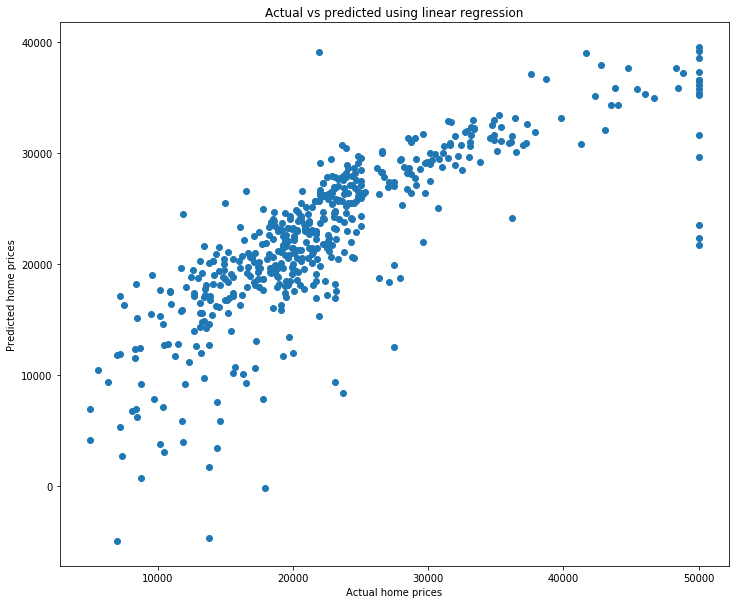

In [ ]:
fig = plt.figure(figsize=(12, 10))
plt.scatter(y, lr1_pred)

plt.xlabel('Actual home prices')
plt.ylabel('Predicted home prices')
plt.title('Actual vs predicted using linear regression');

What are we looking at? Each point represents a home. The x value is the actual home price, and the y value is the predicted home price using our linear regression model. Let's look at a single point to make this clear. I'll do this by plotting twice: once for all except the first prediction, and once for the first prediction (in a different color to make it easy to see). I'll also make the size bigger using `s`.

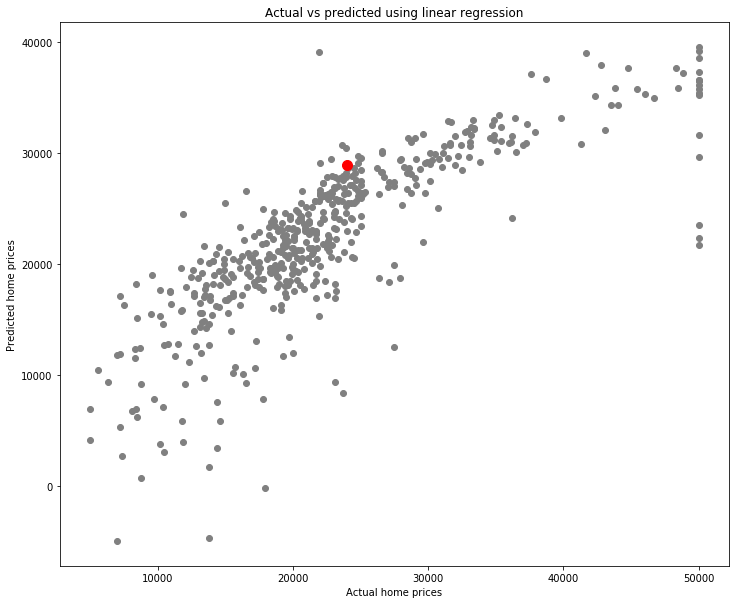

In [ ]:
fig = plt.figure(figsize=(12, 10))
plt.scatter(y[1:], lr1_pred[1:], color='gray')
plt.scatter(y[0], lr1_pred[0], color='red', s=100)

plt.xlabel('Actual home prices')
plt.ylabel('Predicted home prices')
plt.title('Actual vs predicted using linear regression');

What is this red point?

In [ ]:
print(f'Actual home value = {y[0]}, Predicted home value = {lr1_pred[0]}')

Actual home value = 24000.0, Predicted home value = 28964.93256553912


It is a home which cost \\$24,000 and had a predicted home price of a little over \\$28,857. We can see the information on it by looking at the data.

In [ ]:
X.iloc[0]

crime_rate                0.00632
avg_num_rooms             6.57500
pct_below_poverty_line    4.98000
Name: 0, dtype: float64

So how should we make sense of the scatter plot above? Think about the following: suppose the regression line made perfect predictions. That is, suppose that for every single home, the regression line could predict exactly the correct value. Here is a simple example:

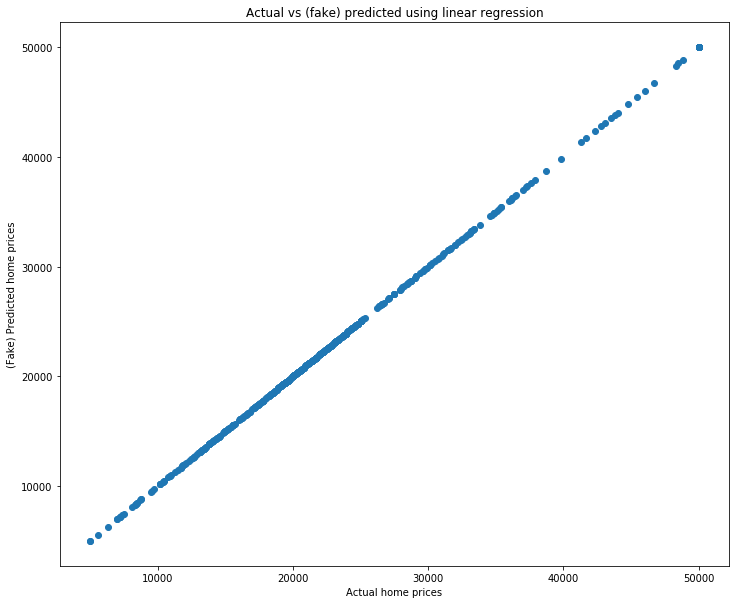

In [ ]:
y = df['median_home_value']
y_pred_fake = y # The (fake) predicted values are exactly the real values.

# Make the scatterplot
fig = plt.figure(figsize=(12, 10))
plt.scatter(y, y_pred_fake)

plt.xlabel('Actual home prices')
plt.ylabel('(Fake) Predicted home prices')
plt.title('Actual vs (fake) predicted using linear regression');

A perfect line! that is because both the x and y values are identical. So a model which returned perfect predictions would have this scatter plot being a perfect line. 

Because of this, a common way to measure how strong a model's predictions are is by making this scatter plot and computing the correlation coefficient $R^2$. Let's do that now using what we learned last homework.

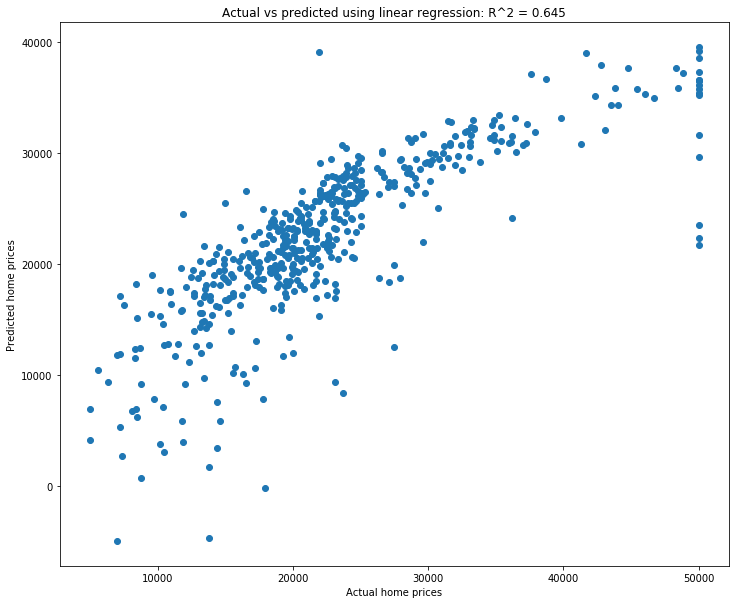

In [ ]:
fig = plt.figure(figsize=(12, 10))
plt.scatter(y, lr1_pred)

plt.xlabel('Actual home prices')
plt.ylabel('Predicted home prices')
plt.title(f'Actual vs predicted using linear regression: R^2 = {np.corrcoef(y, lr1_pred)[0,1]**2:.3f}');

Not bad! That is a high correlation coefficient, as reflected by the fact that the scatterplot is quite linear. This means that our predictions are generally pretty good. 

At this point you don't really have a grasp on what's "good" and "not good". We'll do one more example below, but I highly encourage you to play with all of this on your own. Use both this dataset and others to try it all out.

Let's pick some columns that probably *aren't* that useful in predicting home value and see what we get.

In [ ]:
lr_weak = LinearRegression()

X_weak = df[['pct_industrial', 'distance_to_downtown', 'pupil_teacher_ratio']]
y = df['median_home_value'] # y is the same regardless, it's just the home prices

lr_weak.fit(X_weak, y)

y_weak_pred = lr_weak.predict(X_weak)

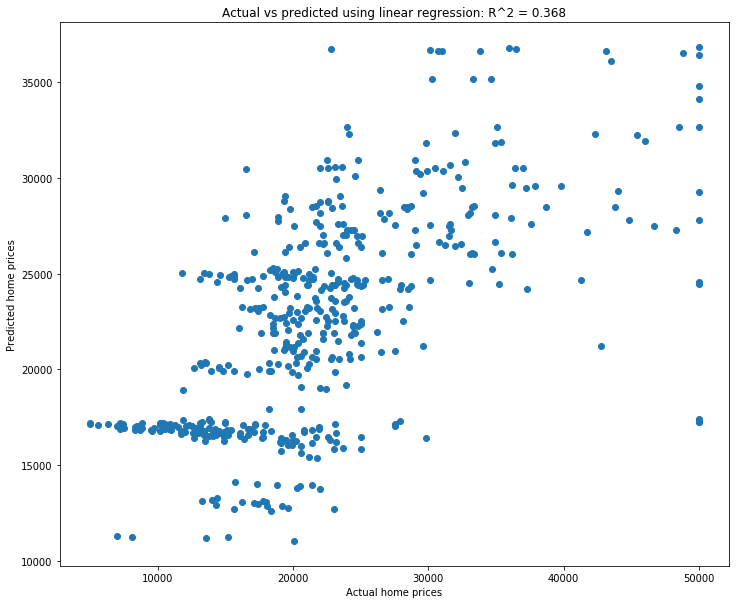

In [ ]:
fig = plt.figure(figsize=(12, 10))
plt.scatter(y, y_weak_pred)

plt.xlabel('Actual home prices')
plt.ylabel('Predicted home prices')
plt.title(f'Actual vs predicted using linear regression: R^2 = {np.corrcoef(y, y_weak_pred)[0, 1]**2:.3f}');

A much lower $R^2$ value, and a much less linear graph. We can see that generally higher actual home prices seem to match with higher predicted home prices, and similarly for lower-priced homes. But the correlation is pretty weak.

Since computing the correlation coefficient between the actual and predicted y values is so common and important, sklearn has it built-in. You can access the $R^2$ value using the `.score(...)` method. Go look at the documentation on it now on the sklearn page. At this point you should be comfortable enough reading that documentation to try it on your own.

In [ ]:
lr1.score(X, y)

0.645389993799838

This shows one particular way to compare how "good" different models' predictions are. That is, we can compare their $R^2$ value by using `.score()`.

In [ ]:
print(f'Score for lr1 (fit_intercept=False, normalize=False): {lr1.score(X, y)}')
print(f'Score for lr2 (fit_intercept=True, normalize=False): {lr2.score(X, y)}')
print(f'Score for lr3 (fit_intercept=False, normalize=True): {lr3.score(X, y)}')
print(f'Score for lr4 (fit_intercept=True, normalize=True): {lr4.score(X, y)}')

Score for lr1 (fit_intercept=False, normalize=False): 0.645389993799838
Score for lr2 (fit_intercept=True, normalize=False): 0.645852051578113
Score for lr3 (fit_intercept=False, normalize=True): 0.645389993799838
Score for lr4 (fit_intercept=True, normalize=True): 0.6458520515781131


It ends up that all three have very similar scores! In other words, it seens like those changes are making only very minor differences. Perhaps normalizing (*without* fitting the intercept) is very slightly the worst, but the difference is so small it likely isn't statistically significant.

## Training vs testing <a id="train_test"></a>

Now that you know how model training works, let's do some more examples. Suppose you go back through your old exams and you find what score you got. You then estimate how many hours you studied alone, how many hours you studied with a group, and how many hours you were studying for other courses that week. You then decide to build a linear model that will predict your score on your next exam, given how many hours you studied each way.

In [ ]:
# Hours studied
exam_df = pd.DataFrame({'score': [56, 86, 84], 'hours_alone': [3, 8, 4], 'hours_group': [3, 6, 10], 'hours_other': [7, 2, 5]})

X = exam_df[['hours_alone', 'hours_group', 'hours_other']]
y = exam_df['score']

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's now look at the $R^2$ value (the score) to see how well this model fits the data.

In [ ]:
lr.score(X, y)

1.0

My god, it's perfect! We have a perfect model that can determine exactly what score we will get based on knowing this study info! Let's confirm that.

In [ ]:
exam_df

,score,hours_alone,hours_group,hours_other
0,56,3,3,7
1,86,8,6,2
2,84,4,10,5


In [ ]:
print(f'Actual score for first exam: {y[0]}, Predicted score for first exam: {lr.predict(X)[0]:.2f}')
print(f'Actual score for second exam: {y[1]}, Predicted score for first exam: {lr.predict(X)[1]:.2f}')
print(f'Actual score for third exam: {y[2]}, Predicted score for first exam: {lr.predict(X)[2]:.2f}')

Actual score for first exam: 56, Predicted score for first exam: 56.00
Actual score for second exam: 86, Predicted score for first exam: 86.00
Actual score for third exam: 84, Predicted score for first exam: 84.00


We've done it! Let's go publish our results and become heroes to every student who wants to know how long they need to study! 

Okay, enough sarcasm, obviously something is wrong here. The numbers above are just made up (go ahead, try tweaking them and see that your model is essentially always perfect), and yet it can perfectly predict our scores? That doesn't make sense. What's happening is that *we are testing our model and the same data that we are training it with*. To understand this, consider the following real-world situation: Suppose your professor tells you your next exam is in a week. She gives you a practice exam, but you're too busy to really spend much time with it. However, just because you've seen it, you memorized the answers. You don't know how to do the problems, but you remember that the answer to the first problem is 42, the second is $x^2+y$, and so forth. Finally, the day of the test arrives. You sit down nervous about how much your grade is going to tank after this exam. She passes out the exams and you flip it over only to find...it's exactly the same as the practice test! Thrilled, you write down the correct answers and turn in the test after just 30 seconds. You come back next week to see that you got a perfect score!

Does this mean that you *understand* the material? Of course not! You simply memorized the answers. More importantly, you don't know how to *generalize* to other topics. For example, perhaps you memorized that if $f(x)=2x^3$ then $f'(1) = 6$. However, if you got a new question "$f(x)=2x^4$, compute $f'(1)$" you would have no idea how to do it. This is exactly what happened with our model above. We trained it using some data for which it "memorized" the answers by choosing values of $m$ and $b$ which would produce perfect results. It then simply spit those back out when asked for predictions. Let's illustrate this by putting in the data for another exam you studied for.

In [ ]:
# Create a DataFrame for this single exam
next_exam_df = pd.DataFrame({'score': [76], 'hours_alone': [7], 'hours_group': [4], 'hours_other': [19]})

# Concatenate it to the already existing DataFrame
exam_df = pd.concat([exam_df, next_exam_df])
exam_df = exam_df.reset_index(drop=True)

exam_df.head()

,score,hours_alone,hours_group,hours_other
0,56,3,3,7
1,86,8,6,2
2,84,4,10,5
3,76,7,4,19


In [ ]:
X = exam_df[['hours_alone', 'hours_group', 'hours_other']]
y = exam_df['score']

print(f'Actual score for fourth exam: {y[3]}, Predicted score for fourth exam: {lr.predict(X)[3]:.2f}')

Actual score for fourth exam: 76, Predicted score for fourth exam: 40.08


Not even close! The reason is that our model did not learn to *generalize* what it learned. In reality, there's a bit more going on here. This is a linear system with three columns (variables) and three rows (exams). So it just solved the system and found a solution. However, in general models are *underdetermined*, meaning there are more rows than columns. Thus they cannot solve for a solution, they always have to approximate it. Regardless, the idea is the same: it is a mistake to *test* a model on the same data that you *trained* it on. Said in simple terms, the professor should have given you a real exam which was different (but similar) to the practice exam.

## Train-test split <a id="train_test_split"></a>

The fix to this is to take your data and **split** it into training and testing sets. The idea is that you will *train* your model on the **training set**, and *test* (or *evaluate*) your model on the **test set**. 

Splitting is very simple--it just consists of randomly putting some rows aside as the test set, and leaving the rest as the training set. Let's use some data on avocado sales to do this.

In [ ]:
df = pd.read_csv(drive_dir + 'data/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Here is a brief rundown of the columns:
- **Date:** The week when sales were measured
- **AveragePrice:** The average price of a single avocado
- **Total Volume:** The total number of avocado's sold in that week
- **4046:** The number of small avocados sold (4046 is the PLU code)
- **4225:** The number of large avocados sold
- **4770:** The number of extra-large avocados sold
- **Total Bags:** The total number of bags of avocados sold
- **Small Bags/Large Bags/XLarge Bags:** The total number of small/large/xlarge bags sold
- **type:** Whether the avocados were conventional or organic
- **year:** The year
- **region:** The region of sales

We'll start by quickly cleaning and checking the data, and renaming some columns.

In [ ]:
df = df.drop('Unnamed: 0', axis='columns')
df.columns = ['date', 'avg_price', 'total_volume', 'small', 'large', 'xlarge', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year', 'region']

df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,date,avg_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.isna().sum()

date            0
avg_price       0
total_volume    0
small           0
large           0
xlarge          0
total_bags      0
small_bags      0
large_bags      0
xlarge_bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
df.dtypes

date            datetime64[ns]
avg_price              float64
total_volume           float64
small                  float64
large                  float64
xlarge                 float64
total_bags             float64
small_bags             float64
large_bags             float64
xlarge_bags            float64
type                    object
year                     int64
region                  object
dtype: object

Let's now split into training and testing sets. One way would be to just take the first rows and set them aside.

In [ ]:
num_rows = df.shape[0]
print(f'# rows = {num_rows}')

# rows = 18249


In [ ]:
# Keep 30% of the data for testing
first_30_pct = int(0.3 * num_rows)

# Make the test set be the first 30%...
test_df = df.iloc[:first_30_pct]

# ... and the training set the last 70%
train_df = df.iloc[first_30_pct:]

In [ ]:
test_df.shape

(5474, 13)

In [ ]:
train_df.shape

(12775, 13)

While this may seem reasonable, there are potential problems here. For example, what if your data was sorted by date? Or by neighborhood? Or by home value? By taking the first 30% we're potentially taking the first 30% of the dates or lowest 30% of home values, or only certain neighborhoods. We always want our samples to be representative of the population, so this could be a problem. 

The simplest fix is just to take a random sample. If you happen to know that your data has some other structure that you want to preserve (like neighborhoods), perhaps you could sample from those neighborhoods instead and be fancier. But 99% of the time the best idea is just to take a random sample. 

The simplest way to take a random sample is by using sklearn. They have a helper function called `train_test_split()`. You just need to supply your data, and what percentage of the data you want to be in the training set. The function will handle the rest.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.3)

In [ ]:
test_df.shape

(5475, 13)

In [ ]:
train_df.shape

(12774, 13)

Now that we have our data split into a training and testing set let's train on that train set and test on the test set. We'll try to predict the number of large avocados sold based on information about the small avocados.

In [ ]:
# Split into training and testing data (30% test)
train_df, test_df = train_test_split(df, test_size=0.3)

# Grab the columns we want for X and y for both train and test
X_train = train_df[['small', 'small_bags', 'avg_price']]
y_train = train_df['large']

X_test = test_df[['small', 'small_bags', 'avg_price']]
y_test = test_df['large']

# Create the linear regression object
lr = LinearRegression()

# Fit (i.e. train) the model on the training data
lr.fit(X_train, y_train)

# See how well it did (R^2 score) by looking at the test data
lr.score(X_test, y_test)

0.8779421117852404

## Examining your predictions <a id="examining_predictions"></a>

That's a really strong score! Let's look at the prediction vs ground truth scatterplot to see how it lines up.

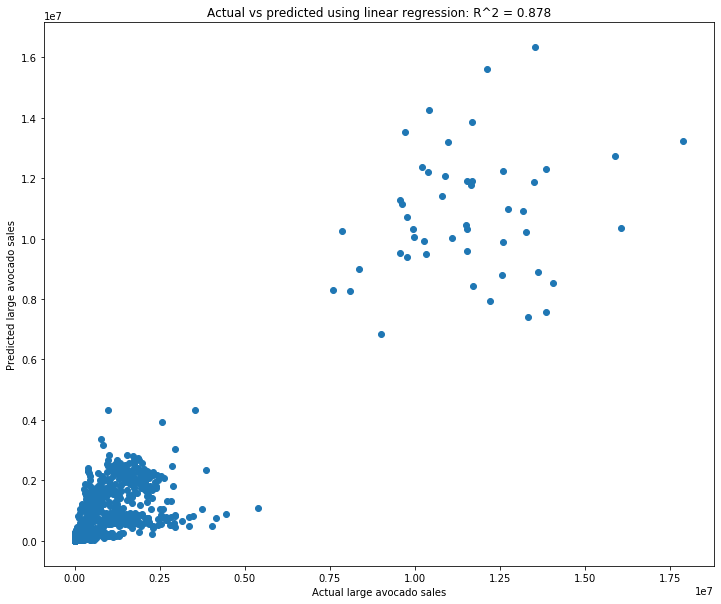

In [ ]:
fig = plt.figure(figsize=(12, 10))
# Note that we look at the predictions on the _test_ set
test_pred = lr.predict(X_test)
plt.scatter(y_test, test_pred)

plt.xlabel('Actual large avocado sales')
plt.ylabel('Predicted large avocado sales')
plt.title(f'Actual vs predicted using linear regression: R^2 = {np.corrcoef(y_test, test_pred)[0,1]**2:.3f}');

Hmm, that's interesting. It looks like the majority of the actual large avocado sales are fairly low (the bottom-left). There's also a small set of outliers with large sales. 

This example shows why you always need to actually *look at* what your model is predicting. While it returns a very high $R^2$ value, the actual scatterplot of predictions doesn't look great. It seems like the majority of the avocados are in the clump in the lower-left, and it doesn't look like the predictions are great there.

Let's dive into this further. First we want to see how "large" prices are distributed. A boxplot seems like a good choice for this.

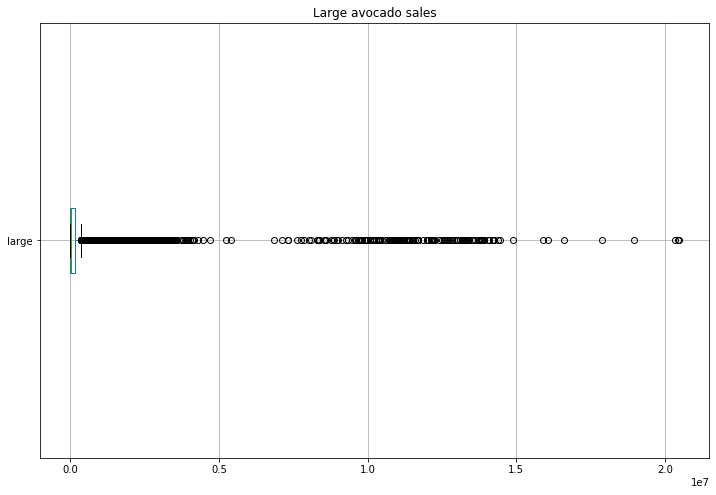

In [ ]:
ax = df.boxplot('large', figsize=(12, 8), vert=False)
ax.set_title('Large avocado sales');

So the avocado sales are almost entirely in the smaller side, with a bunch of outliers. Let's try grouping by a few different factors, and see if we can figure out if some partial factor (organic vs conventional, a certain region, a certain year) is where all of those high sales are located.

In [ ]:
# Group by type
df.groupby('type')['large'].mean()

type
conventional    574805.318859
organic          15411.857724
Name: large, dtype: float64

Yes, organic are sold in far lower numbers, but the "conventional" sales of 574805 is in scientific notation $5.7 \cdot 10^5$, which is still way, way on the left of the boxplot. So that's not the issue. Let's try regions.

In [ ]:
# Group by region
df.groupby('region')['large'].mean()

region
Albany                 3.762121e+04
Atlanta                3.121851e+04
BaltimoreWashington    2.459829e+05
Boise                  3.461682e+03
Boston                 2.142199e+05
BuffaloRochester       3.166395e+04
California             1.039915e+06
Charlotte              3.662802e+04
Chicago                2.545190e+05
CincinnatiDayton       6.105890e+04
Columbus               1.691030e+04
DallasFtWorth          1.395577e+05
Denver                 1.503270e+05
Detroit                3.479935e+04
GrandRapids            5.101043e+04
GreatLakes             7.907033e+05
HarrisburgScranton     6.121225e+04
HartfordSpringfield    1.119752e+05
Houston                1.411965e+05
Indianapolis           4.279241e+04
Jacksonville           1.043414e+04
LasVegas               4.545688e+04
LosAngeles             3.021715e+05
Louisville             2.488955e+04
MiamiFtLauderdale      4.411622e+04
Midsouth               6.579085e+05
Nashville              1.127370e+04
NewOrleansMobile     

Skimming through the regions, the sales seem to be reasonably similar across the board. In the boxplot the outlier sales are on the order of $2 \cdot 10^7$, and we're not seeing anything like that here. California is about $10^6$, which is $0.1 \cdot 10^7$, so also not an outlier. Let's try year.

In [ ]:
# Group by year
df.groupby('year')['large'].mean()

year
2015    313633.844367
2016    297850.478632
2017    269964.124350
2018    314628.606698
Name: large, dtype: float64

Nope, still nothing jumping out. Let's try just directly grabbing those outliers and looking at them, maybe something will jump out.

In [ ]:
outlier_df = df[df['large'] > 0.5 * 10**7]

In [ ]:
outlier_df.head()

,date,avg_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
2652,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
2653,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2654,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
2655,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
2656,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS


In [ ]:
df.head()

,date,avg_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


That's interesting, the first few in `outlier_df` all have a region of `TotalUS`. Is that a coincidence?

In [ ]:
outlier_df['region'].value_counts()

TotalUS      169
Northeast      2
Name: region, dtype: int64

Doesn't look like it! Let's see how many `TotalUS` rows there are all together in the original data.

In [ ]:
df[df['region'] == 'TotalUS'].shape[0]

338

Let's directly look at those.

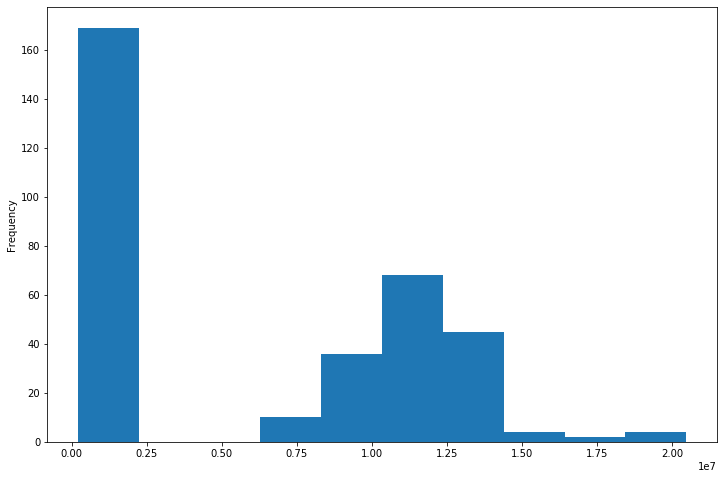

In [ ]:
df[df['region'] == 'TotalUS']['large'].plot(kind='hist', figsize=(12, 8))

So that's why, when we grouped by region, `TotalUS` didn't jump out. Yes, there are plenty of outliers, but there are also plenty on the low range which "cancel out" the outliers. 

Regardless, it seems silly to compare individual regions (Albany, Boise, etc.) to the entire US. Let's remove those and just work with actual regions.

In [ ]:
region_df = df[df['region'] != 'TotalUS']

In [ ]:
region_lr = LinearRegression()

# Split into training and testing data (30% test)
train_df, test_df = train_test_split(region_df, test_size=0.3)

Wait a second, we're duplicating code from above! That means we should make a function.

In [ ]:
def lr_train_test_split(df, X_cols, y_col, test_size=0.3):
    # Split into training and testing data (30% test)
    train_df, test_df = train_test_split(df, test_size=0.3)

    # Grab the columns we want for X and y for both train and test
    X_train = train_df[X_cols]
    y_train = train_df[y_col]

    X_test = test_df[X_cols]
    y_test = test_df[y_col]

    # Create the linear regression object
    lr = LinearRegression()

    # Fit (i.e. train) the model on the training data
    lr.fit(X_train, y_train)
    
    return lr, X_train, y_train, X_test, y_test

In [ ]:
region_lr, X_train, y_train, X_test, y_test = lr_train_test_split(region_df, X_cols=['small', 'small_bags', 'avg_price'], y_col='large')

In [ ]:
region_lr.score(X_test, y_test)

0.651555153955232

We have a lower, but still strong $R^2$ value. Let's look at the scatterplot.

In [ ]:
def lr_scatterplot(lr, X_test, y_test):
    fig = plt.figure(figsize=(12, 10))
    
    test_pred = lr.predict(X_test)
    plt.scatter(y_test, test_pred)

    plt.xlabel('Actual sales')
    plt.ylabel('Predicted sales')
    plt.title(f'Actual vs predicted using linear regression: R^2 = {np.corrcoef(y_test, test_pred)[0,1]**2:.3f}');

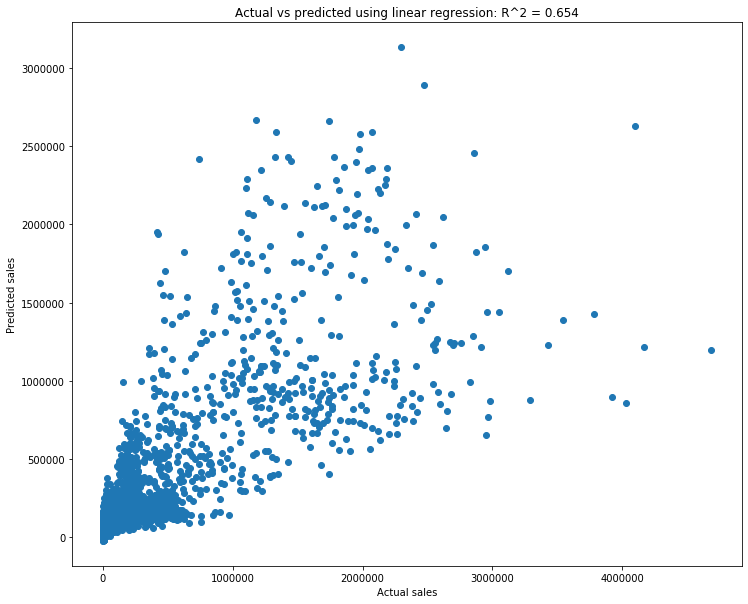

In [ ]:
lr_scatterplot(region_lr, X_test, y_test)

That looks decent. The cone shape is not great, as it means that there is a range of predicted values corresponding to any actual value. But regardless, we have a model that does decently well.

This sort of "inspecting your model" is absolutely necessary. If you ever train a model and then stop, you are doing data science wrong. What makes a good data scientist is *not* how many models you know or how quickly you write code, it's how well you understand your model and data. Someone who is able to dive into and understand their model and data is far more useful as a data scientist than someone who simply knows commands. Make it a habit to spent several multiples more time *analyzing* your model and data than *modeling* your data.

## Exercises

1. Repeat the models comparing small sales to large sales, but with different columns. For instance, use medium to predict large. Try to not just copy-paste the code above. First, do as much as you can from memory. Then, when you get stuck, go up and see how to proceed. Type that part, and then again try to do the next step on your own. Repeat.
2. Do exercise 1 again, but with new columns. This sort of "try on your own, look for help when you're stuck" process is the best way to learn these things, so do it over and over.
3. Use more or less columns.
4. Get another dataset and do linear regression on it. As you may have guessed from these exercises, linear regression is incredibly important, and the best thing you can do right now is to practice it.